# <span style="color:#336699">Web Crop Phenology Metrics Service (WCPMS) S2 - Data cube crop phenology calculation</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: Sept 14, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook explains how to use the WCPMS service to extract phenology metrics on regions from <em>Earth Observation Data Cubes</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Sansigolo, G.; Ferreira, K. R.; Queiroz, G. R.; Körting, T.; Leão, L. P. G.; Adami, M.<a href="http://www.google.com" target="_blank">A tool for crop phenology metrics analysis from big Earth observation data
    </div>
</div>

For running the examples in this Jupyter Notebook you will need to install the [simplecube Python package](https://pypi.org/project/simplecube/) and [WCPMS Server Python package](https://github.com/GSansigolo/wcpms) . To install it from PyPI using `pip`, use the following command:

In [1]:
#pip install git+https://github.com/GSansigolo/wcpms
#!pip install simplecube

In order to access the funcionalities of the simplecube, you should import the `simplecube` package and `os` package, as follows:

In [2]:
from simplecube import simple_cube

# Sentinel-2 Data cube
<hr style="border:1px solid #0077b9;">

In order to retrieve the data cube from satellite imagery as multidimensional arrays associated with a region (bounding box) and a time interval we created the `simple_cube` function.

In [3]:
S2_NDVI_cube=simple_cube(
    collection="S2-16D-2",
    start_date="2024-01-01",
    end_date="2024-12-31",
    bbox="-46.7743,-15.9686,-46.5824,-15.7992",
    bands=["NDVI"]
)

S2_NDVI_cube

Fetching... : 100%|██████████| 23/23 [00:00<00:00, 137.74 scenes/s]


<xarray.Dataset> Size: 187MB
Dimensions:      (band: 1, x: 2078, y: 1953, time: 23)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 17kB 5.763e+06 5.763e+06 ... 5.784e+06 5.784e+06
  * y            (y) float64 16kB 9.564e+06 9.564e+06 ... 9.544e+06 9.544e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 184B 2024-01-01 2024-01-17 ... 2024-12-18
Data variables:
    ndvi         (time, band, y, x) int16 187MB 4316 4208 4142 ... 5773 5482

# Data cube crop phenology calculation
<hr style="border:1px solid #0077b9;">

In [4]:
from wcpms_server import params_phenometrics, phenometrics_data_cube

/home/sansigolo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
config = params_phenometrics(
    peak_metric='pos', 
    base_metric='vos', 
    method='seasonal_amplitude', 
    factor=0.2, 
    thresh_sides='two_sided', 
    abs_value=0.1
)

# Phenometrics data cube
<hr style="border:1px solid #0077b9;">

There is a function to perform a phenometrics data cube called `phenometrics_data_cube`:

In [7]:
ds_phenos = phenometrics_data_cube(
    da=S2_NDVI_cube['ndvi'],
    engine='phenolopy',
    config=config
)

ds_phenos

<xarray.Dataset> Size: 325MB
Dimensions:      (band: 1, y: 1953, x: 2078)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 17kB 5.763e+06 5.763e+06 ... 5.784e+06 5.784e+06
  * y            (y) float64 16kB 9.564e+06 9.564e+06 ... 9.544e+06 9.544e+06
    spatial_ref  int32 4B 0
    time         (band, y, x) datetime64[ns] 32MB 2024-12-18 ... 2024-02-02
Data variables: (12/18)
    pos_values   (band, y, x) float32 16MB 6.193e+03 5.837e+03 ... 9.065e+03
    pos_times    (band, y, x) float32 16MB 353.0 353.0 353.0 ... 33.0 33.0 33.0
    mos_values   (band, y, x) float32 16MB 6.02e+03 5.618e+03 ... 8.724e+03
    vos_values   (band, y, x) float32 16MB -992.0 -551.0 ... 1.85e+03 1.756e+03
    vos_times    (band, y, x) float32 16MB 289.0 289.0 305.0 ... 257.0 257.0
    bse_values   (band, y, x) float32 16MB 2.6e+03 2.643e+03 ... 3.078e+03
    ...           ...
    roi_values   (band, y, x) float32 16MB 21.4 143.6 137.0 ... 151.4 145.8
    rod_values   (band, y, x) float32 16MB nan nan nan ... 48.41 48.8 50.04
    lios_values  (band, y, x) float32 16MB 0.0 0.0 0.0 ... 6.448e+04 6.356e+04
    sios_values  (band, y, x) float32 16MB 0.0 0.0 0.0 ... 4.69e+04 4.688e+04
    liot_values  (band, y, x) float32 16MB 8.885e+04 8.246e+04 ... 9.607e+04
    siot_values  (band, y, x) float32 16MB 1.107e+05 9.458e+04 ... 5.744e+04
Attributes:
    grid_mapping:  spatial_ref

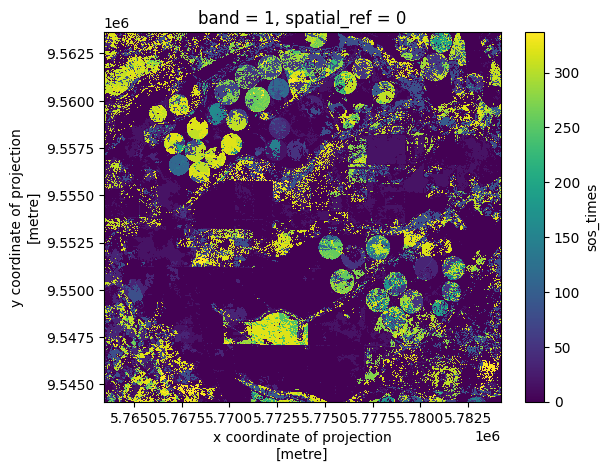

In [8]:
ds_phenos_2d = ds_phenos['sos_times']

ds_phenos_2d.plot()